# Tasks 

In [144]:
import numpy as np 
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math
import seaborn as sns
import random
from scipy.stats import f_oneway, norm
from statsmodels.stats.power import FTestAnovaPower
from statsmodels.stats.oneway import effectsize_oneway

import warnings
warnings.filterwarnings('ignore') # prevent warnings from stats.shapiro()

# Setting a random seed so the same samples can be randommy calculated from the same starting position
np.random.seed(42)

## Task 1: Permutations and Combinations

Suppose we alter the Lady Tasting Tea experiment to involve twelve cups of tea. Six have the milk in first and the other six having tea in first. A person claims they have the special power of being able to tell whether the tea or the milk went into a cup first upon tasting it. You agree to accept their claim if they can tell which of the six cups in your experiment had the milk in first.

Calculate, using Python, the probability that they select the correct six cups. Here you should assume that they have no special powers in figuring it out, that they are just guessing. Remember to show and justify your workings in code and MarkDown cells.

Suppose, now, you are willing to accept one error. Once they select the six cups they think had the milk in first, you will give them the benefit of the doubt should they have selected at least five of the correct cups. Calculate the probability, assuming they have no special powers, that the person makes at most one error.

The Lady Tasting tea experiment arose when Muriel Bristol, a PhD scientist, claimed that she could determine if tea or milk was put in the cup first with Ronald Fisher creating an experiemnt to test this (Cunningham, 2021). The results were published in Fischer (1935) as a thought experiment with a permutation-based inference which developed into Fisher's exact test (Cunningham, 2021). 

### Selecting the correct six cups of tea in a row

In [145]:
total_cups_tea = 12
milk_first = 6
tea_first = 6

x = math.comb(12, 6)
probability = 1/x
print(f'The probability of chosing six cups of tea in a row out of six is 1/924, or a proability of {probability:.4f}.')


The probability of chosing six cups of tea in a row out of six is 1/924, or a proability of 0.0011.


The probability that they select the correct six cups in order is 1/924 or 0.0011 when calcualted using the *math.comb* function. Written another way, there are 6 ways to choose six cups (12 * 11 * 10 * 9 * 8 * 7 = 665280) and there are 720 ways to order six cups in a row (6 * 5 * 4 * 3 * 2 * 1 = 720) which equalts to 924 (665280 / 720 = 924) (Cunningham, 2021).

In [146]:
import itertools

labels = list(range(1, 13, 1)) # starting at 1 and ending at 12

# generating the labels as a list - this is similar to math.comb(12, 6) with the same ouput, but now we have the cups labelled 
combinations = list(itertools.combinations(labels, tea_first))
print(len(combinations))

sample_tea = random.sample(labels, 6) # selecting a sample of six cups from one of 12 cups in labels to put the tea in first, 
# then sorting it to match ordering format of combinations above
sample_tea.sort()

# combinations shows us that there are 924 combinations of selecting 6 cups from 12 and their associated labels (not printed to console as it 
# would be 924 lines)


924


In [147]:
# calculating the overalap between each element of combinations and labels (of cup)

no_overlaps = []

for combination in combinations:
    set_1 = set(combination)
    set_2 = set(sample_tea)
    overlap = set_1.intersection(set_2)
    no_overlaps.append(len(overlap))

    
counts_per_cup = np.unique(no_overlaps, return_counts=True)
counts_per_cup

(array([0, 1, 2, 3, 4, 5, 6]),
 array([  1,  36, 225, 400, 225,  36,   1], dtype=int64))

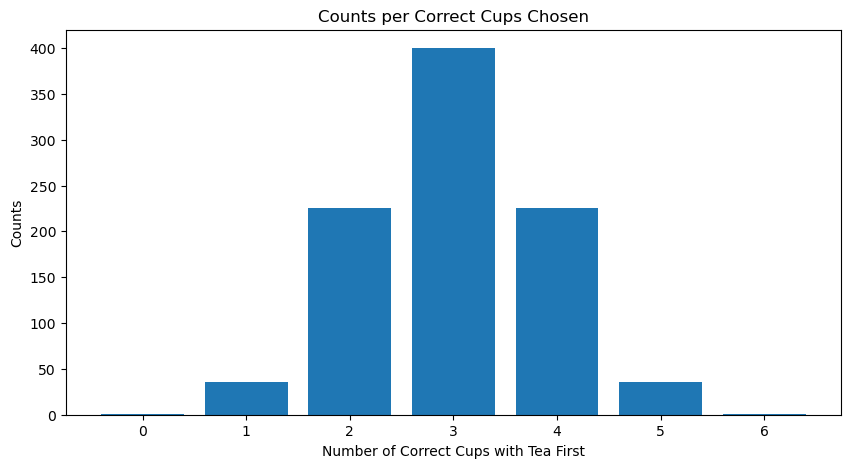

In [148]:
fig, ax = plt.subplots(figsize=(10, 5))

# Bar chart.
ax.bar(counts_per_cup[0], counts_per_cup[1])
ax.set_title('Counts per Correct Cups Chosen')
ax.set_ylabel('Counts')
ax.set_xlabel('Number of Correct Cups with Tea First');

From the below images we can see each combination of 6 cups and the number of cups that are common with that combination. For example, there are three cups (2, 5, 6) that are overlapping with the first combination (1, 2, 3, 4, 5, 6).

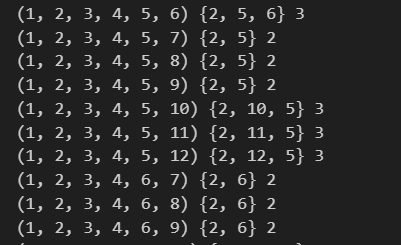

### Selecting the correct six cups of tea in a row with one error

In [149]:
one_error = math.comb(6, 5) * math.comb(6, 1)
total = math.comb(12,6)

result = one_error/total

print(one_error, np.round(result, 3))

36 0.039


### Selecting the correct six cups of tea in a row with two errors

In [150]:
two_errors = math.comb(6, 4) * math.comb(6, 2)

result = two_errors/total

print(two_errors, np.round(result, 3))

225 0.244


In the first question there are 924 total combinations to select 6 from 12 not counting if milk first or tea first (*n! / (k! * (n - k)!)* where  *n12! / (6! * (12 - 6)!)* = 924) using the formula from [*math.comb*](https://docs.python.org/3/library/math.html#math.comb) which equates to a probability of 0.0011. 

If we can let the Lady make one mistake, then the probability is 0.039. However, if two mistakes were made then the proability increaes to 0.244. There are 36 possible combinations in which one mistake can be made in choosing 6 from 12, while there are 225 possible combinations while making two mistakes in choosing 6 from 12. These numbers agree with the numbers per array in the **counts_per_cup** object created above. 

Two errors couldn't be accepted as this would mean accepting an error rate of nearly 1/4 (probability of two errors is 0.244). 

## Task 2: numpy's Normal Distribution

In this task you will assess whether *numpy.random.normal()* properly generates normal values. To begin, generate a sample of one hundred thousand values using the function with mean 10.0 and standard deviation 3.0.

Use the *scipy.stats.shapiro()* function to test whether your sample came from a normal distribution. Explain the results and output.

Plot a histogram of your values and plot the corresponding normal distribution probability density function on top of it.

In [151]:
normal = np.random.normal(loc=10, scale=3, size=100000)

print(normal.mean(),normal.std())
# https://numpy.org/doc/2.0/reference/random/generated/numpy.random.normal.html

10.00290060442285 3.002702862884671


In [152]:
normal_test = stats.shapiro(normal)
print(normal_test.statistic, normal_test.pvalue)

# ref https://www.statology.org/shapiro-wilk-test-python/

0.9999908845449028 0.9998300806280184


The output of a Shapiro-Wilk test is the test statistic (the W statistic) and the p-value and it tests for normality, i.e. did the daa arise from a normal distribution. 

 Given that the p-value (0.81) of the Shapiro-Wilk test is above the significance level or alpha of 0.05 we fail to reject the Null hypothesis and conclude that there is not sufficient evidence to suggest that the data generated above does not come from a normal distribution. A Q-Q plot would be better to determine if data came from a normal distribution as the Null Hypothesis wasn't rejected and the data could have come from a different distribution. 

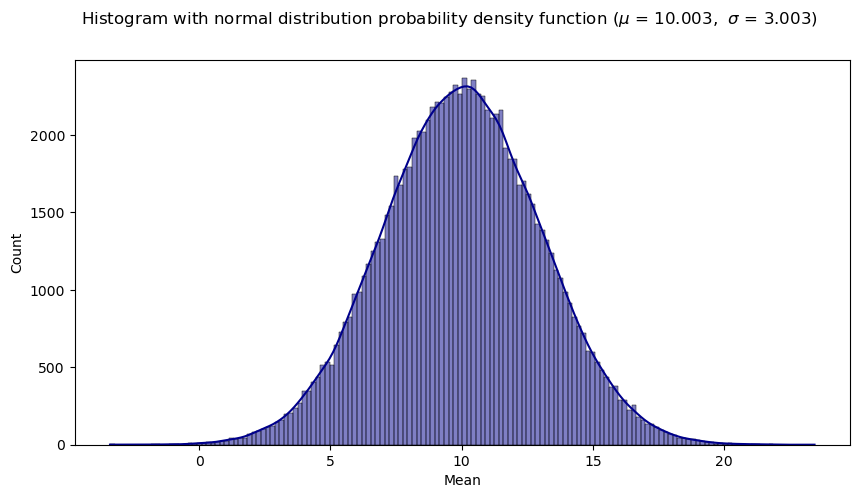

In [153]:
mu, std = norm.fit(normal)
fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle('Histogram with normal distribution probability density function ($\mu$ = %.3f,  $\sigma$ = %.3f)' % (mu, std))
sns.histplot(normal, kde=True, color = 'darkblue')
ax.set_xlabel('Mean');

## Task 3: t-Test Calculation

Consider the following dataset containing resting heart rates for patients before and after embarking on a two-week exercise program. Calculate the t-statistic based on this data set, using Python. Compare it to the value given by *scipy.stats*.

**Table 1:** Data for test
|Patient ID	   |0	|1	|2	|3	|4	|5	|6	|7	|8	|9| 
|:-------------|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|Before        |63	 |68   |70   |	64 |74	 |67   |70	 |57   |66	 | 65  |
|After	       |64	 |64   |68   |	64 |73   |	70 |72   |	54 |61   |	63 |


**Note:** The above table was created in markdown using a [Codecademy](https://www.codecademy.com/resources/docs/markdown/tables) webpage as guidance. Too keep the numbers centre aligned the *:---:* was used inbetween the vertical lines (*|*). 

In [154]:
# Initialize data to dataframe
data = {'Patient_ID': [0,1,2,3,4,5,6,7,8,9],
        'Before': [63, 64, 70, 64, 74, 67, 70, 57, 66, 65],
        'After': [64, 64, 68, 64, 73, 70, 72, 54, 61, 63]}
patient_data = pd.DataFrame(data)
print(patient_data.head(2))

   Patient_ID  Before  After
0           0      63     64
1           1      64     64


### T-test using python

As this data is paired, a paired t-test (or dependent t-test) can be used to compare. This test is useful for before-and-after measurements for a group of people such as in this example ([JMP](https://www.jmp.com/en_nl/statistics-knowledge-portal/t-test/paired-t-test.html)). 

The assumptions of the paired t-test are;
- Patients must be independent. 
- Each of the paired measurements must be obtained from the same patient.
- The measured differences are normally distributed.

Whilst the first two assumptions are two, the below Q-Q plots show that both sets of before and after are normally distributed. 

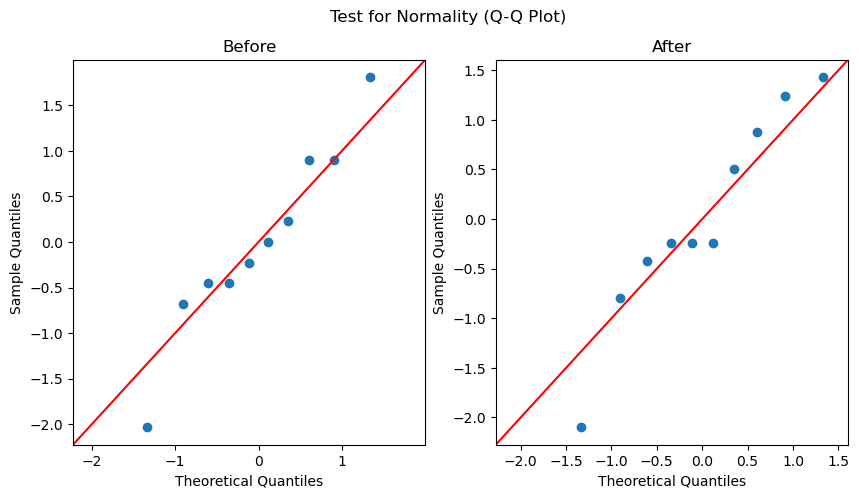

In [155]:
# test for normality assumption 
# While a Sharpio-Wilk test could be used, it would be easier to do it via visual assessment using a Q-Q plot
# Subplotting for matplotlib plots is straightforward, but subplotting with statsmodels plots such as the Q-Q plot can be trickier. 
# The below website address this with subplotting with seaborn as an example, but was modified to work with the qqplot function in 
# statsmodels. 
# Resource; https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8
# https://www.scientificamerican.com/article/how-the-guinness-brewery-invented-the-most-important-statistical-method-in/

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Test for Normality (Q-Q Plot)')
sm.qqplot(patient_data['Before'],line='45', fit=True, ax=ax[0])
ax[0].set_title('Before')
sm.qqplot(patient_data['After'],line='45', fit=True, ax=ax[1])
ax[1].set_title('After')
plt.show();

In [156]:
# While the data is mostly on the line, a check of the mean and median (50%) below shows that for both they are similar and as such are 
# approximately noramlly distributed and as all t-test assumptions are made, we can carry out t-test. 

print(patient_data.describe())

       Patient_ID     Before      After
count    10.00000  10.000000  10.000000
mean      4.50000  66.000000  65.300000
std       3.02765   4.666667   5.677441
min       0.00000  57.000000  54.000000
25%       2.25000  64.000000  63.250000
50%       4.50000  65.500000  64.000000
75%       6.75000  69.250000  69.500000
max       9.00000  74.000000  73.000000


To test in python a function can be written with data as input with the associated alpha (normally 5%). While there is an example of how to do this [here](https://machinelearningmastery.com/how-to-code-the-students-t-test-from-scratch-in-python/) it needs to be altered 

In [157]:
def paired_ttest(data1, data2, alpha=0.05):
    '''
    Takes two columns (data1, data2) and alpha and computes the paired t-test 
    whilst returning the t-test statisti, degrees of freedom, critica value, 
    and p-value. 

    parameters:
        data1 (DataFrame): column1 of dataframe
        data1 (DataFrame): column1 of dataframe
        alpha (int): significane level (default value of 0.05)

    Returns:
        t_stat: t-test test statistic
        df: degrees of freedom
        cv: critical value
        p: p-value



    adapted from: https://machinelearningmastery.com/how-to-code-the-students-t-test-from-scratch-in-python/

'''
    mean1, mean2 = np.mean(data1), np.mean(data2)
    n = len(data1)
    d1 = np.sum([(data1[i]-data2[i])**2 for i in range(n)])
    d2 = np.sum([data1[i]-data2[i] for i in range(n)])
    sd = np.sqrt((d1 - (d2**2 / n)) / (n - 1))
    sed = sd / np.sqrt(n)
    t_stat = (mean1 - mean2) / sed
    df = n - 1
    cv = stats.t.ppf(1.0 - alpha, df)
    p = (1.0 - stats.t.cdf(abs(t_stat), df)) * 2.0 # *2 as two-sided test
    return t_stat, df, cv, p

In [158]:
t_stat, df, cv, p = paired_ttest(patient_data['Before'], patient_data['After'])
print(f"T-test Statistic = {t_stat:.3f} \nDegrees of freedom = {df} \nCritical Value = {cv:.3f} \np-value = {p:.4f}")


T-test Statistic = 0.920 
Degrees of freedom = 9 
Critical Value = 1.833 
p-value = 0.3816


### T-test using Scipy.Stats

In [159]:
# stats.ttest_rel is the paired t-test available from scipi and used for comparison . 
t_test = stats.ttest_rel(patient_data['Before'],patient_data['After'],alternative='two-sided')
print(t_test)

TtestResult(statistic=0.9200267041104794, pvalue=0.3815568006229638, df=9)


### Conclusion

**Table 2:** Comparision of results
|Method	   |t statistic	|p-value	|df	|
|:-------------|:---:|:---:|:---:|
|Python        |0.920	 |0.3816   |9   |
|*stats.ttest_rel*	       |0.920	 |0.3816   |9   |

Table 2 shows that both the python approach and *stats.ttest_rel* results the same results (the *alternative* parameter was selected as two-sided as the question required to assess for a difference not if heart rates decreased or increased after the exercise program which would result in a one-sided test). 

The null hypothesis (H<sub>0</sub>) is that the population mean of the differences is zero whilst the alternative hypothesis (H<sub>1</sub>) is that the population mean of the differences does not equal which is written as(link to [site](https://www.jmp.com/en_nl/statistics-knowledge-portal/t-test/paired-t-test.html));\
**Null Hypothesis**: H<sub>0</sub>: μd = 0\
**Alternative Hypothesis**: H<sub>1</sub>: μd ≠ 0

As the p-value > 0.05 this means that the null hypothesis (H<sub>0</sub>) cannot be rejected and one must conclude that there is no evidence in the data to suggest that the two-week exercise program lowers heart-rate. 

## Task 4: ANOVA

In this test we will estimate the probability of committing a type II error in specific circumstances. To begin, create a variable called no_type_ii and set it to 0.

Now use a loop to perform the following test 10,000 times.

1. Use *numpy.random.normal* to generate three samples with 100 values each. Give each a standard deviation of 0.1. Give the first sample a mean of 4.9, the second a mean of 5.0, and the third a mean of 5.1.

2. Perform one-way anova on the three samples and add 1 to no_type_ii whenever a type II error occurs.

Summarize and explain your results.

In [160]:
# https://sciences.usca.edu/biology/zelmer/305/anova/
# https://study.com/skill/learn/calculating-probability-of-a-type-ii-error-for-a-specific-significance-test-when-given-the-power-explanation.html#:~:text=Step%201%3A%20Identify%20the%20given,about%20the%20Type%20II%20Error.
# https://fastercapital.com/content/Type-II-error--Avoiding-Missed-Discoveries-in-Two-Way-ANOVA.html#:~:text=Interactions%20in%20Two%2DWay%20ANOVA,and%20conduct%20post%2Dhoc%20tests.
# https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_power/bs704_power_print.html

In [161]:
# no_type_ii = 0

# for i in range(10000):
#     normal1 = np.random.normal(loc=4.9, scale=0.1, size=100)
#     normal2 = np.random.normal(loc=5.0, scale=0.1, size=100)
#     normal3 = np.random.normal(loc=5.1, scale=0.1, size=100)
#     group_means = (np.mean(normal1), np.mean(normal2), np.mean(normal3))
#     group_stds = (np.std(normal1), np.std(normal2), np.std(normal3))
#     anova = f_oneway(normal1, normal2, normal3)
#     n_groups, nobs, alpha = 3, 300, 0.05
#     effect_size = effectsize_oneway(group_means, group_stds, nobs=nobs)
#     power_analysis = FTestAnovaPower()
#     power = power_analysis.solve_power(effect_size=effect_size, k_groups=n_groups, nobs=nobs, alpha=alpha)
#     prob_type_ii_error = 1 - power # probability of beta ris
#     if prob_type_ii_error > 0.94:
#         no_type_ii += 1
    

In [162]:
def func(mean1, mean2, mean3, std1, std2, std3, n1, n2, n3):
    no_type_ii = 0
    prob_type_ii = []
    for i in range(10000):
        normal1 = np.random.normal(loc=mean1, scale=std1, size=n1)
        normal2 = np.random.normal(loc=mean2, scale=std2, size=n2)
        normal3 = np.random.normal(loc=mean3, scale=std3, size=n3)
        group_means = (np.mean(normal1), np.mean(normal2), np.mean(normal3))
        group_stds = (np.std(normal1), np.std(normal2), np.std(normal3))
        anova = f_oneway(normal1, normal2, normal3)
        n_groups, nobs, alpha = 3, (n1 + n2 + n3), 0.05
        effect_size = effectsize_oneway(group_means, group_stds, nobs=nobs)
        power_analysis = FTestAnovaPower()
        power = power_analysis.solve_power(effect_size=effect_size, k_groups=n_groups, nobs=nobs, alpha=alpha)
        prob_type_ii_error = 1 - power # probability of beta risk
        if prob_type_ii_error > 0.05:
            no_type_ii += 1
        # prob_type_ii.append(prob_type_ii_error)
        return print(f"There were {no_type_ii} instances of Type II errors out of 10000 ANOVA tests or {(no_type_ii/10000)*100}%")
    

    # https://study.com/skill/learn/calculating-probability-of-a-type-ii-error-for-a-specific-significance-test-when-given-the-power-explanation.html#:~:text=Step%201%3A%20Identify%20the%20given,about%20the%20Type%20II%20Error.

In [163]:
print(func(4.9, 5.0, 5.1, 0.1, 0.1, 0.1, 100, 100, 100))

There were 1 instances of Type II errors out of 10000 ANOVA tests or 0.01%
None


In [164]:
def func_(mean1, mean2, mean3, std1, std2, std3, n1, n2, n3):
    no_type_ii = 0
    for i in range(10000):
        normal1 = np.random.normal(loc=mean1, scale=std1, size=n1)
        normal2 = np.random.normal(loc=mean2, scale=std2, size=n2)
        normal3 = np.random.normal(loc=mean3, scale=std3, size=n3)
        _, p_value = f_oneway(normal1, normal2, normal3)
        if p_value > 0.05:
            no_type_ii += 1
    print(no_type_ii)

In [165]:
print(func_(4.9, 5.0, 5.1, 0.1, 0.1, 0.1, 100, 100, 100))

0
None


## References 
Fisher, R.A., 1935. *The Design of Experiments*. Oliver & Boyd.

Cunningham, S., 2021. Casual Inference: The Mixtape. Yale University Press. 